## Homework 3 Problem 8:
### Moment Estimation through Monte Carlo simulations

In [191]:
# Code from prompt
longest.run <- function(n){
    x <- rbinom(n, 1, 0.5)
    diffs <- diff(x)
    change.positions <- seq(1:n-1)[abs(diff(x)) == 1]
    change.positions <- c(0, change.positions, n)
    max(diff(change.positions))
}

mean.run <- function(run.length, iterations){
    x <- rep(run.length, iterations)
    longest.runs <- sapply(x, longest.run)
    mean(longest.runs)
}

var.run <- function(run.length, iterations){
    x <- rep(run.length, iterations)
    longest.runs <- sapply(x, longest.run)
    mean.longest.runs <- mean(longest.runs)
    return((sum(longest.runs ** 2) / iterations) - mean.longest.runs ** 2)
}

In [206]:
flip.counts <- seq(10, 250, 10)
avg.run.lengths <- sapply(flip.counts, mean.run, iterations=1000)

In [207]:
avg.run.lengths

[1] 3.653 4.603 5.195 5.614 6.021 6.215 6.552 6.586 6.754 6.956 7.082 7.216
[13] 7.328 7.471 7.573 7.689 7.667 7.770 7.964 7.945 8.050 8.117 8.136 8.212
[25] 8.305

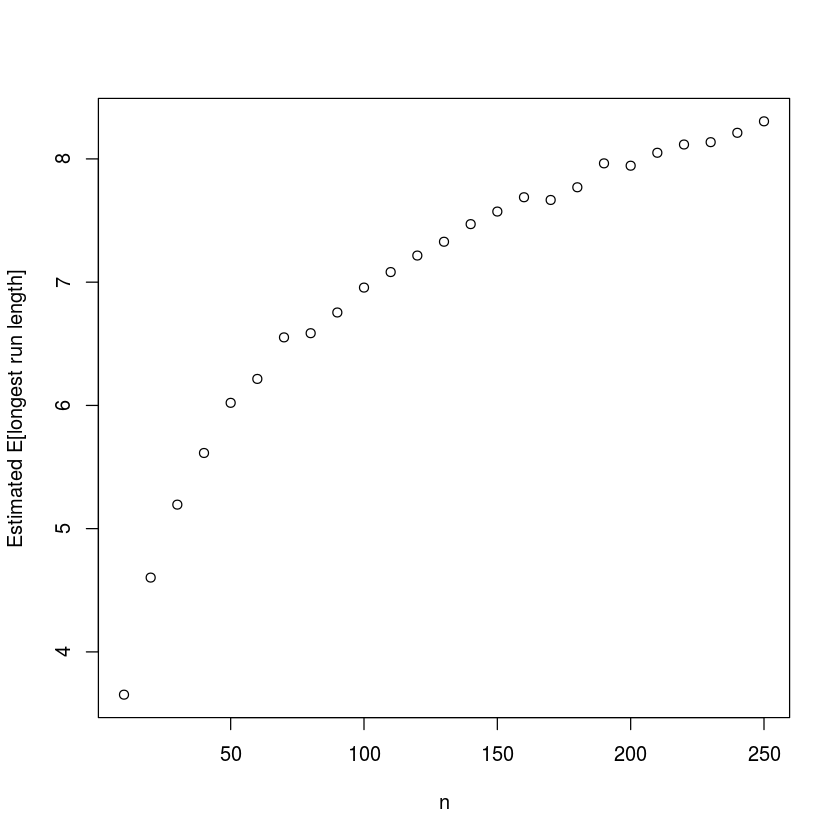

In [226]:
plot(flip.counts, avg.run.lengths, xlab='n', ylab='Estimated E[longest run length]')

In [209]:
# fit the line without an intercept because the longest run of 0 flips is 0 
lmfit <- lm(avg.run.lengths ~ 0 + log(flip.counts))
c <- summary(lmfit)$coefficients[1, 1]

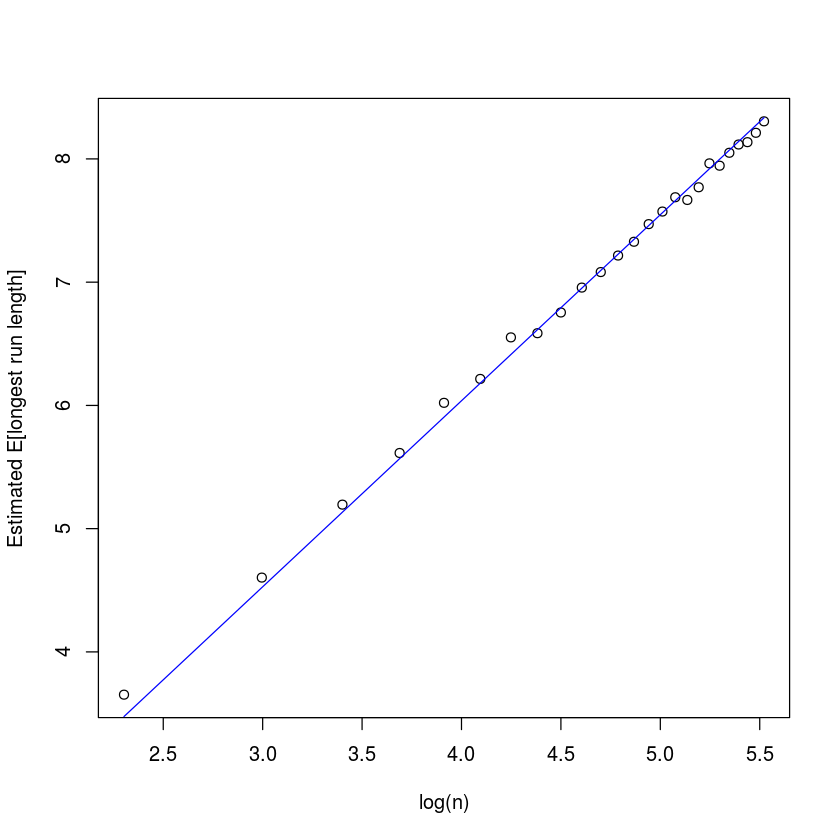

In [227]:
plot(log(flip.counts), avg.run.lengths, ylab='Estimated E[longest run length]', xlab='log(n)')
lines(log(flip.counts), predict(lmfit), col = 'blue')

**Compare c * log(500) vs MC estimate of longest run in 500 flips**

they look pretty close

In [211]:
c * log(500)

[1] 9.380741

In [212]:
mean.run(500, 1000)

[1] 9.22

In [219]:
var.run.lengths <- sapply(flip.counts, var.run, iterations=100000)

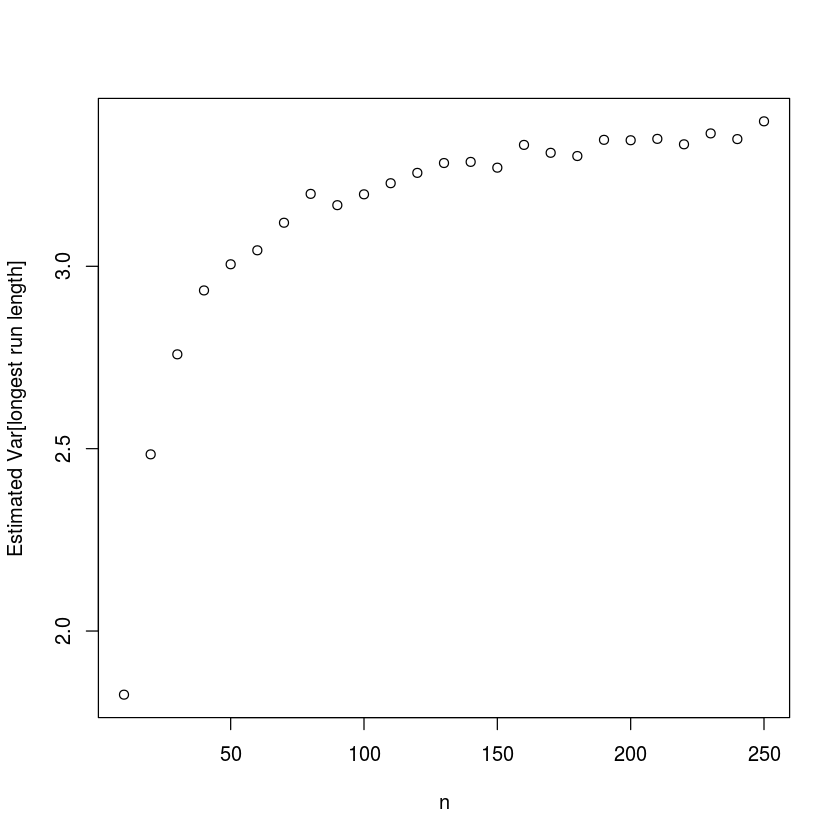

In [228]:
plot(flip.counts, var.run.lengths, xlab='n', ylab='Estimated Var[longest run length]')

In [201]:
var.run(100000, 100)

[1] 4.7539